<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-the-Kaggle-Titanic-competition-dataset" data-toc-modified-id="Read-the-Kaggle-Titanic-competition-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read the Kaggle Titanic competition dataset</a></span></li><li><span><a href="#EDA-and-pre-processing" data-toc-modified-id="EDA-and-pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA and pre-processing</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics-(data-shape,-balance,-etc)" data-toc-modified-id="Descriptive-statistics-(data-shape,-balance,-etc)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Descriptive statistics (data shape, balance, etc)</a></span><ul class="toc-item"><li><span><a href="#Target-distribution" data-toc-modified-id="Target-distribution-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Target distribution</a></span></li><li><span><a href="#Selected-features-vs-target-historgrams" data-toc-modified-id="Selected-features-vs-target-historgrams-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Selected features vs target historgrams</a></span></li><li><span><a href="#Data-summary---and-missing-values-analysis" data-toc-modified-id="Data-summary---and-missing-values-analysis-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Data summary - and missing values analysis</a></span></li></ul></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data pre-processing</a></span></li></ul></li><li><span><a href="#ML-template-starts---training-session" data-toc-modified-id="ML-template-starts---training-session-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ML template starts - training session</a></span><ul class="toc-item"><li><span><a href="#Training-model-(LGBM)-with-stratisfied-CV" data-toc-modified-id="Training-model-(LGBM)-with-stratisfied-CV-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Training model (LGBM) with stratisfied CV</a></span></li></ul></li><li><span><a href="#Model-evaluation" data-toc-modified-id="Model-evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model evaluation</a></span><ul class="toc-item"><li><span><a href="#Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class" data-toc-modified-id="Plot-of-the-CV-folds---F1-macro-and-F1-for-the-positive-class-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Plot of the CV folds - F1 macro and F1 for the positive class</a></span></li><li><span><a href="#Scikit-learn---Classification-report" data-toc-modified-id="Scikit-learn---Classification-report-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Scikit learn - Classification report</a></span></li><li><span><a href="#ROC-curve-with-AUC" data-toc-modified-id="ROC-curve-with-AUC-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ROC curve with AUC</a></span></li><li><span><a href="#Confusion-Matrix-plot-(normalized-and-with-absolute-values)" data-toc-modified-id="Confusion-Matrix-plot-(normalized-and-with-absolute-values)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Confusion Matrix plot (normalized and with absolute values)</a></span></li><li><span><a href="#Feature-Importance-plot" data-toc-modified-id="Feature-Importance-plot-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Feature Importance plot</a></span></li><li><span><a href="#Correlations-analysis-(on-top-features)" data-toc-modified-id="Correlations-analysis-(on-top-features)-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Correlations analysis (on top features)</a></span></li><li><span><a href="#Data-leakage-test" data-toc-modified-id="Data-leakage-test-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Data leakage test</a></span></li><li><span><a href="#Analysis-of-FPs/FNs" data-toc-modified-id="Analysis-of-FPs/FNs-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Analysis of FPs/FNs</a></span><ul class="toc-item"><li><span><a href="#Top-FPs-with-full-features" data-toc-modified-id="Top-FPs-with-full-features-4.8.1"><span class="toc-item-num">4.8.1&nbsp;&nbsp;</span>Top FPs with full features</a></span></li><li><span><a href="#Top-FNs-with-full-features" data-toc-modified-id="Top-FNs-with-full-features-4.8.2"><span class="toc-item-num">4.8.2&nbsp;&nbsp;</span>Top FNs with full features</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import warnings
import pandas as pd 
import numpy as np
#from pandas_summary import DataFrameSummary
import octopus_ml as oc 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
%matplotlib inline
warnings.simplefilter("ignore")

# Read the Kaggle Titanic competition dataset 
https://www.kaggle.com/c/titanic

In [2]:
XY_df=pd.read_csv('../datasets/Kaggle_titanic_train.csv')

# EDA and pre-processing 

## Descriptive statistics (data shape, balance, etc)

In [3]:
XY_df.shape

(891, 12)

In [4]:
XY_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Target distribution

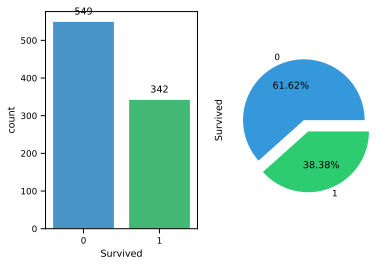

<Figure size 144x216 with 0 Axes>

In [5]:
oc.label_dist(XY_df,'Survived')

### Selected features vs target historgrams 

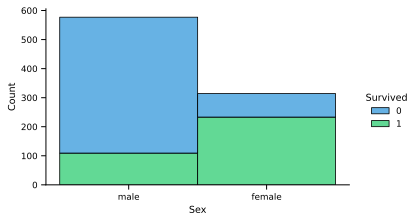

In [6]:
oc.hist_target(XY_df, 'Sex', 'Survived')

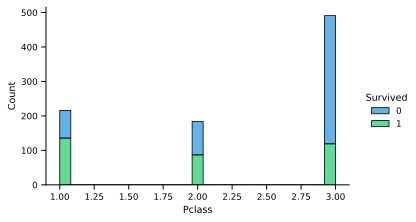

In [7]:
oc.hist_target(XY_df, 'Pclass', 'Survived')

### Data summary - and missing values analysis

In [8]:
# Top 5 sparse features, mainly labs results 
pd.Series(1 - XY_df.count() / len(XY_df)).sort_values(ascending=False).head(10)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
dtype: float64

## Data pre-processing 

In [9]:
XY_df['Cabin'] = XY_df['Cabin'].astype('str').fillna("U0")
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
XY_df['Deck'] = XY_df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
XY_df['Deck'] = XY_df['Deck'].map(deck)
XY_df['Deck'] = XY_df['Deck'].fillna(0)
XY_df['Deck'] = XY_df['Deck'].astype('category')

XY_df['relatives'] = XY_df['SibSp'] + XY_df['Parch']
XY_df.loc[XY_df['relatives'] > 0, 'not_alone'] = 0
XY_df.loc[XY_df['relatives'] == 0, 'not_alone'] = 1
XY_df['not_alone'] = XY_df['not_alone'].astype(int)

def encodeAgeFare(train):
    train.loc[train['Age'] <= 16, 'Age_fare'] = 0
    train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_fare'] = 1
    train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age_fare'] = 2
    train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age_fare'] = 3
    train.loc[ (train['Age'] > 48) & (train['Age'] <= 80), 'Age_fare'] = 4
    
    train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
    train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare_adj'] = 1
    train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31.0), 'Fare_adj'] = 2
    train.loc[(train['Fare'] > 31.0) & (train['Fare'] <= 512.329), 'Fare_adj'] = 3

encodeAgeFare(XY_df)


In [10]:
# Categorical features pre-proccesing  
cat_list ,XY_df=oc.cat_features_proccessing(XY_df)
print (cat_list)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Deck']


In [11]:
features=XY_df.columns.to_list()
print ('number of features ', len(features))

features_remove=['PassengerId','Survived']
for f in features_remove:
    features.remove(f)

number of features  17


In [12]:
X=XY_df[features]
y=XY_df['Survived']

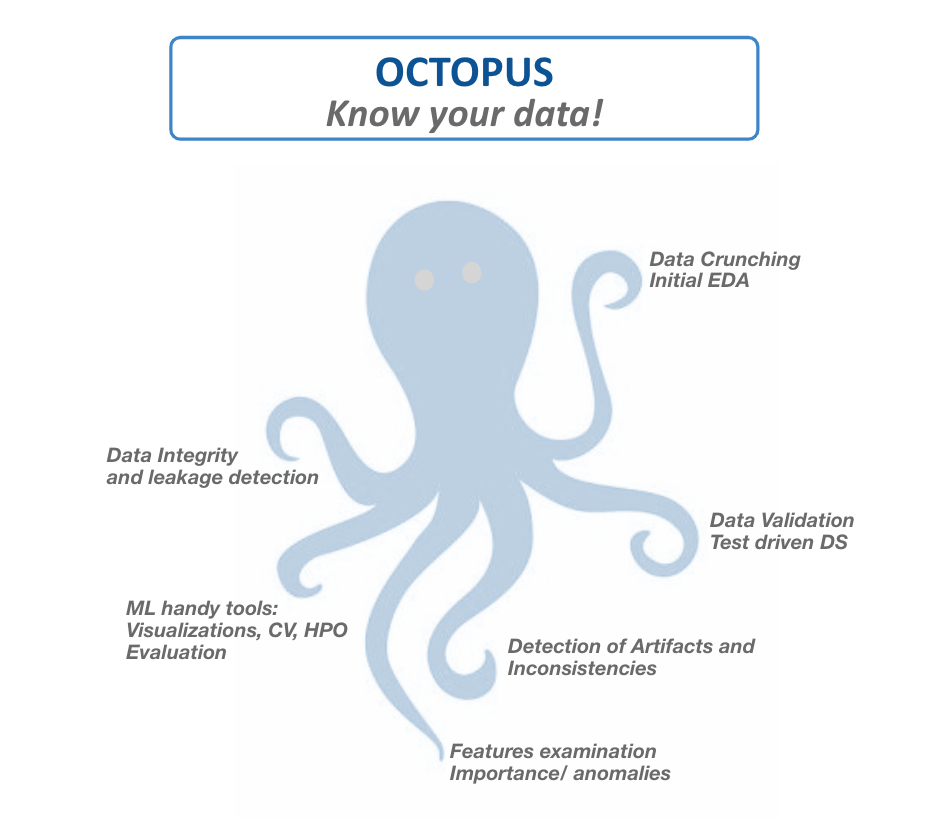

In [13]:
from IPython.display import Image
Image("../images/octopus_know_your_data.PNG", width=600, height=600)

In [14]:
XY_sampled=oc.sampling(XY_df,'Survived',200)

number of positive instances: 342 
number of negative instance :  549
new dataset shape:  (542, 17)
Method Name       : sampling
Current memory usage: 0.21843MB
Peak                : 0.232416MB
Total time taken:   7.001 ms 


# ML template starts - training session 

## Training model (LGBM) with stratisfied CV 

In [15]:
params = {
        'boosting_type': 'gbdt',
        'objective': 'binary',
        'metric': 'auc',
        #'learning_rate': 0.1,
        #'n_estimators': 100,
        'verbose': -1,
        #'max_depth': -1,
        #'seed':100,      
        #'min_split_gain': 0.01, 
        #'num_leaves': 18, 
        #'reg_alpha': 0.01, 
        #'reg_lambda': 1.50,
        #'feature_fraction':0.2,
        #'bagging_fraction':0.84
}
    
metrics= oc.cv_adv(X,y,0.5,100,shuffle=False,params=params,method='full')

1it [00:00,  7.27it/s]

--------------------------- Running Cross-Validation - classification, mode: full ---------------------------
-> Starting 5-folds CV - Shuffle: False
[1]	training's auc: 0.905555	valid_1's auc: 0.823518
[2]	training's auc: 0.908679	valid_1's auc: 0.833399
[3]	training's auc: 0.917069	valid_1's auc: 0.844862
[4]	training's auc: 0.918129	valid_1's auc: 0.839592
[5]	training's auc: 0.919902	valid_1's auc: 0.837022
[6]	training's auc: 0.922622	valid_1's auc: 0.828788
[7]	training's auc: 0.923665	valid_1's auc: 0.824967
[8]	training's auc: 0.923895	valid_1's auc: 0.822793
[9]	training's auc: 0.92515	valid_1's auc: 0.819368
[10]	training's auc: 0.927032	valid_1's auc: 0.818643
[11]	training's auc: 0.928017	valid_1's auc: 0.81693
[12]	training's auc: 0.928509	valid_1's auc: 0.818709
[13]	training's auc: 0.929881	valid_1's auc: 0.821739
[14]	training's auc: 0.931588	valid_1's auc: 0.825823
[15]	training's auc: 0.933136	valid_1's auc: 0.831752
[16]	training's auc: 0.935046	valid_1's auc: 0.8355

2it [00:00,  7.24it/s]

[2]	training's auc: 0.919134	valid_1's auc: 0.821591
[3]	training's auc: 0.91955	valid_1's auc: 0.820588
[4]	training's auc: 0.922181	valid_1's auc: 0.821257
[5]	training's auc: 0.922817	valid_1's auc: 0.81484
[6]	training's auc: 0.922522	valid_1's auc: 0.818048
[7]	training's auc: 0.92342	valid_1's auc: 0.813837
[8]	training's auc: 0.92384	valid_1's auc: 0.815307
[9]	training's auc: 0.928026	valid_1's auc: 0.817313
[10]	training's auc: 0.927822	valid_1's auc: 0.819652
[11]	training's auc: 0.930844	valid_1's auc: 0.824733
[12]	training's auc: 0.933841	valid_1's auc: 0.823596
[13]	training's auc: 0.935346	valid_1's auc: 0.822393
[14]	training's auc: 0.936343	valid_1's auc: 0.823463
[15]	training's auc: 0.937424	valid_1's auc: 0.825067
[16]	training's auc: 0.939191	valid_1's auc: 0.824265
[17]	training's auc: 0.940184	valid_1's auc: 0.827005
[18]	training's auc: 0.941697	valid_1's auc: 0.827941
[19]	training's auc: 0.943106	valid_1's auc: 0.829813
[20]	training's auc: 0.944848	valid_1's 

4it [00:00,  7.35it/s]

[83]	training's auc: 0.985385	valid_1's auc: 0.886898
[84]	training's auc: 0.985651	valid_1's auc: 0.886497
[85]	training's auc: 0.986008	valid_1's auc: 0.88516
[86]	training's auc: 0.986274	valid_1's auc: 0.884759
[87]	training's auc: 0.986565	valid_1's auc: 0.884492
[88]	training's auc: 0.986881	valid_1's auc: 0.88369
[89]	training's auc: 0.987114	valid_1's auc: 0.883155
[90]	training's auc: 0.987505	valid_1's auc: 0.882754
[91]	training's auc: 0.987663	valid_1's auc: 0.882487
[92]	training's auc: 0.98802	valid_1's auc: 0.882219
[93]	training's auc: 0.988303	valid_1's auc: 0.88262
[94]	training's auc: 0.988361	valid_1's auc: 0.882487
[95]	training's auc: 0.988561	valid_1's auc: 0.882353
[96]	training's auc: 0.988652	valid_1's auc: 0.882487
[97]	training's auc: 0.98876	valid_1's auc: 0.882086
[98]	training's auc: 0.989076	valid_1's auc: 0.881818
[99]	training's auc: 0.989251	valid_1's auc: 0.880882
[100]	training's auc: 0.989525	valid_1's auc: 0.880348
[1]	training's auc: 0.90269	vali

5it [00:00,  7.29it/s]


[1]	training's auc: 0.898747	valid_1's auc: 0.880202
[2]	training's auc: 0.899617	valid_1's auc: 0.879138
[3]	training's auc: 0.901449	valid_1's auc: 0.877809
[4]	training's auc: 0.902627	valid_1's auc: 0.880535
[5]	training's auc: 0.902918	valid_1's auc: 0.881332
[6]	training's auc: 0.908725	valid_1's auc: 0.887581
[7]	training's auc: 0.911951	valid_1's auc: 0.897554
[8]	training's auc: 0.915768	valid_1's auc: 0.897354
[9]	training's auc: 0.917004	valid_1's auc: 0.900878
[10]	training's auc: 0.917233	valid_1's auc: 0.904268
[11]	training's auc: 0.919231	valid_1's auc: 0.901409
[12]	training's auc: 0.920284	valid_1's auc: 0.904467
[13]	training's auc: 0.922149	valid_1's auc: 0.903537
[14]	training's auc: 0.923964	valid_1's auc: 0.903138
[15]	training's auc: 0.924292	valid_1's auc: 0.904467
[16]	training's auc: 0.925408	valid_1's auc: 0.907858
[17]	training's auc: 0.927223	valid_1's auc: 0.910185
[18]	training's auc: 0.928089	valid_1's auc: 0.908722
[19]	training's auc: 0.929004	valid_1

# Model evaluation 

### Plot of the CV folds - F1 macro and F1 for the positive class 

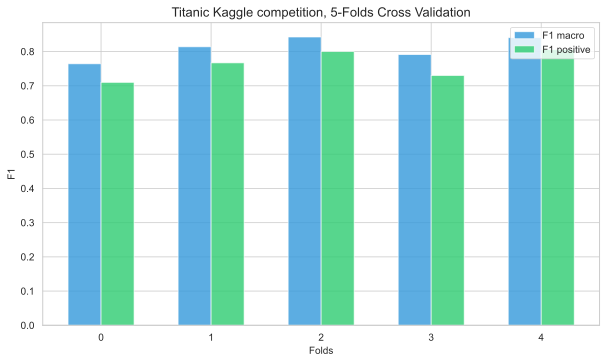

In [16]:
oc.cv_plot(metrics['f1_weighted'],metrics['f1_macro'],metrics['f1_positive'],'Titanic Kaggle competition', mode='full')

### Scikit learn - Classification report 

In [17]:
print(classification_report(metrics['y'], metrics['predictions_folds']))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       549
           1       0.78      0.74      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



### ROC curve with AUC

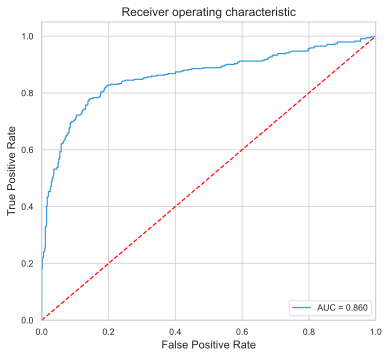

In [18]:
oc.roc_curve_plot(metrics['y'], metrics['predictions_proba'])

### Confusion Matrix plot (normalized and with absolute values) 

<Figure size 432x288 with 0 Axes>

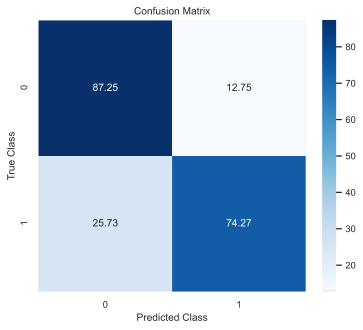

<Figure size 432x288 with 0 Axes>

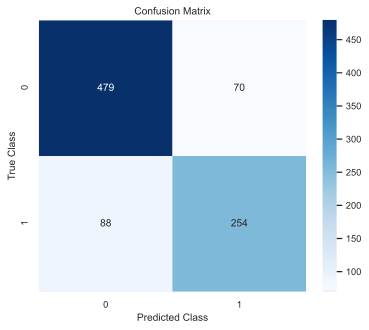

In [19]:
oc.confusion_matrix_plot(metrics['y'], metrics['predictions_folds'])

### Feature Importance plot 

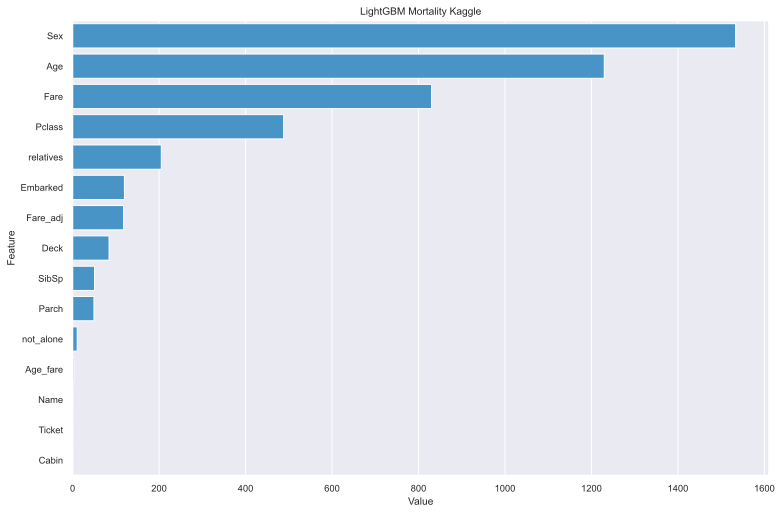

In [20]:
feature_imp_list=oc.plot_imp(metrics['final_clf'],X,'LightGBM Mortality Kaggle',num=16)

In [21]:
top_features=feature_imp_list.sort_values(by='Value', ascending=False).head(20)

In [22]:
top_features

,Value,Feature
2,1533.447014,Sex
3,1229.571753,Age
7,830.124884,Fare
0,488.232013,Pclass
11,205.186978,relatives
9,119.862342,Embarked
14,117.996517,Fare_adj
10,84.367666,Deck
4,50.804104,SibSp
5,49.438082,Parch


## Correlations analysis (on top features)

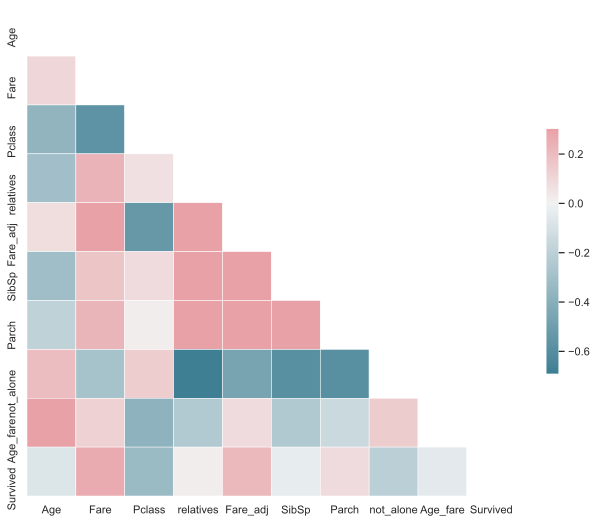

In [23]:
list_for_correlations=top_features['Feature'].to_list()
list_for_correlations.append('Survived')
oc.correlations(XY_df,list_for_correlations)

Best score using built-in LassoCV: 0.175722


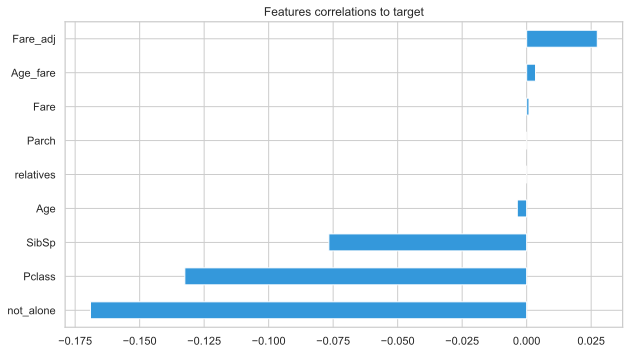

In [24]:
oc.target_corr(X,y,top_features['Feature'].to_list())

### Data leakage test 

In [25]:
oc.data_leakage(X,top_features['Feature'].to_list())

->  Passed the data leakage test - no duplicate intstances detected 
Method Name       : data_leakage
Current memory usage: 0.176999MB
Peak                : 0.343221MB
Total time taken:   7.001 ms 


### Analysis of FPs/FNs

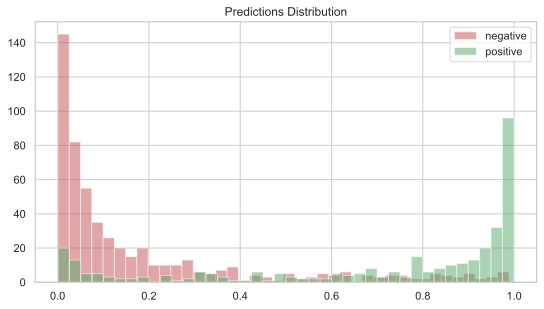

<AxesSubplot:title={'center':'Predictions Distribution'}>

In [26]:
oc.preds_distribution(metrics['y'], metrics['predictions_proba'], bins=40)

In [32]:
fps=oc.recieve_fps(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)
fns=oc.recieve_fns(XY_df, metrics['index'] ,metrics['y'], metrics['predictions_proba'],top=10)

calculating using threshold of:  0.5
calculating using threshold of:  0.5


In [33]:
fps

,index,label,preds_proba,preds_class
0,297,0,0.999470,1
1,498,0,0.997488,1
2,41,0,0.993949,1
3,177,0,0.989277,1
4,357,0,0.988693,1
5,772,0,0.986698,1
6,854,0,0.978937,1
7,312,0,0.975793,1
8,205,0,0.961460,1
9,199,0,0.949403,1


In [34]:
fns

,index,label,preds_proba,preds_class
0,107,1,0.000504,0
1,444,1,0.004639,0
2,391,1,0.004745,0
3,569,1,0.005071,0
4,226,1,0.005936,0
5,543,1,0.005997,0
6,712,1,0.008141,0
7,207,1,0.009590,0
8,127,1,0.013630,0
9,570,1,0.014399,0


In [35]:
filter_fps  = XY_df[XY_df.index.isin(fps['index'])]
filter_fns  = XY_df[XY_df.index.isin(fns['index'])]
filter_fps_with_prediction=pd.merge(filter_fps,fps[['index','preds_proba']], left_on=[pd.Series(filter_fps.index.values)], right_on=fps['index']) 
filter_fns_with_prediction=pd.merge(filter_fns,fns[['index','preds_proba']], left_on=[pd.Series(filter_fns.index.values)], right_on=fns['index']) 

### Top FPs with full features 

In [36]:
filter_fps_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)",female,27.0,1,0,11668,21.0000,nan,S,0.0,1,0,1.0,2.0,41,0.993949
1,177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,3.0,0,1,4.0,2.0,177,0.989277
2,199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,nan,S,0.0,0,1,1.0,1.0,199,0.949403
3,205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,7.0,1,0,0.0,1.0,205,0.961460
4,297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,3.0,3,0,0.0,3.0,297,0.999470
5,312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,nan,S,0.0,2,0,1.0,2.0,312,0.975793
6,357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,nan,S,0.0,0,1,2.0,1.0,357,0.988693
7,498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,3.0,3,0,1.0,3.0,498,0.997488
8,772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S,5.0,0,1,4.0,1.0,772,0.986698
9,854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0000,nan,S,0.0,1,0,2.0,2.0,854,0.978937


### Top FNs with full features 

In [37]:
filter_fns_with_prediction

,key_0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,relatives,not_alone,Age_fare,Fare_adj,index,preds_proba
0,107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,0.0000,nan,S,0.0,0,1,NaN,NaN,107,0.000504
1,127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,0.0000,nan,S,0.0,0,1,1.0,NaN,127,0.013630
2,207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,nan,C,0.0,0,1,1.0,2.0,207,0.009590
3,226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,nan,S,0.0,0,1,1.0,1.0,226,0.005936
4,391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,0.0000,nan,S,0.0,0,1,1.0,NaN,391,0.004745
5,444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,nan,S,0.0,0,1,NaN,1.0,444,0.004639
6,543,544,1,2,"Beane, Mr. Edward",male,32.0,1,0,2908,26.0000,nan,S,0.0,1,0,1.0,2.0,543,0.005997
7,569,570,1,3,"Jonsson, Mr. Carl",male,32.0,0,0,350417,0.0000,nan,S,0.0,0,1,1.0,NaN,569,0.005071
8,570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,nan,S,0.0,0,1,4.0,1.0,570,0.014399
9,712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S,3.0,1,0,2.0,3.0,712,0.008141
